# AutoEncoders

## Autoencoder for Dimensionality Reduction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs

In [2]:
data=make_blobs(n_samples=300, 
                n_features=2, 
                centers=2, 
                cluster_std=1.0, 
                random_state=101)


X, y=data

X

array([[ -8.87772115,  -6.76007802],
       [  0.630638  ,   3.10707466],
       [ -0.24060881,   2.82068999],
       [ -7.83909113,  -8.20754485],
       [-10.9729082 ,  -7.39067645],
       [-10.81648852,  -5.82372891],
       [  0.96977807,   0.50825184],
       [-10.29728144,  -7.21832357],
       [  0.04271579,   3.50389089],
       [  0.15391601,   2.19349145],
       [ -9.81008003,  -5.35480445],
       [-11.18334003,  -6.7004804 ],
       [  0.51876688,   3.39210906],
       [ -8.09111654,  -6.92631627],
       [  1.1112886 ,   0.704398  ],
       [ -7.49469451,  -7.06186612],
       [ -0.75249891,   2.31574949],
       [  0.72046137,   1.63484242],
       [ -0.80867204,   1.41371822],
       [  1.13010192,  -0.25418504],
       [-10.6252148 ,  -6.71479817],
       [ -0.06311641,   3.15682868],
       [  0.56609951,   3.41000402],
       [ -9.10474956,  -7.83047821],
       [-11.33926304,  -7.83622233],
       [  0.29639341,   2.06317757],
       [ -0.52722349,   2.95534215],
 

In [3]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

In [4]:
np.random.seed(101)

z_noise=np.random.normal(size=len(X))
z_noise=pd.Series(z_noise)
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [5]:
feat=pd.DataFrame(X)
feat

,0,1
0,-8.877721,-6.760078
1,0.630638,3.107075
2,-0.240609,2.820690
3,-7.839091,-8.207545
4,-10.972908,-7.390676
...,...,...
295,1.320546,2.605592
296,-8.043916,-6.010589
297,-9.733566,-7.460380
298,-10.722075,-5.568565


In [6]:
feat=pd.concat([feat, z_noise], axis=1)
feat.columns=['X1', 'X2', 'X3']
feat

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118
...,...,...,...
295,1.320546,2.605592,1.523750
296,-8.043916,-6.010589,1.290230
297,-9.733566,-7.460380,-1.478319
298,-10.722075,-5.568565,0.214234


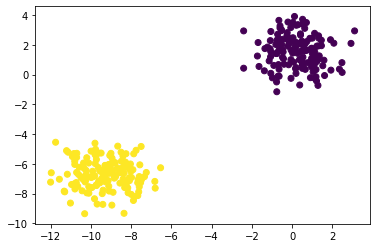

In [7]:
%matplotlib inline
plt.scatter(x=feat['X1'], y=feat['X2'], c=y)

<IPython.core.display.Javascript object>


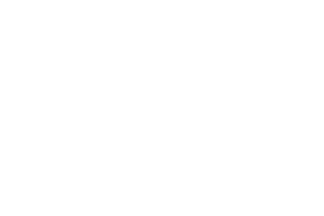

In [8]:
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'], feat['X2'], feat['X3'], c=y) #color do not depend on thee feature X3

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.optimizers import SGD

In [10]:
#   3 ---> 2 ---> 3

In [11]:
# 3 ---> 2
encoder=Sequential()
encoder.add(Dense(units=2, activation='relu', input_shape=[3]))


# 2 ---> 3
decoder=Sequential()
decoder.add(Dense(units=3, activation='relu', input_shape=[2]))


autoencoder=Sequential([encoder, decoder])
autoencoder.compile(loss='mse', optimizer=SGD(lr=1.5))


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(feat)
scaled_data

array([[2.07475524e-01, 1.95571963e-01, 9.85845750e-01],
       [8.35929679e-01, 9.39652004e-01, 6.09403243e-01],
       [7.78344698e-01, 9.18055791e-01, 6.60079904e-01],
       [2.76123683e-01, 8.64187747e-02, 5.86892040e-01],
       [6.89943218e-02, 1.48018660e-01, 6.13565724e-01],
       [7.93328662e-02, 2.66181866e-01, 4.37825912e-01],
       [8.58345111e-01, 7.43675286e-01, 3.42071017e-01],
       [1.13649812e-01, 1.61015757e-01, 6.05388874e-01],
       [7.97071012e-01, 9.69575837e-01, 1.30174900e-01],
       [8.04420781e-01, 8.70758874e-01, 6.29683804e-01],
       [1.45851346e-01, 3.01543367e-01, 5.91417162e-01],
       [5.50858487e-02, 2.00066208e-01, 3.88988121e-01],
       [8.28535567e-01, 9.61146391e-01, 5.29823913e-01],
       [2.59466086e-01, 1.83035970e-01, 3.58225464e-01],
       [8.67698238e-01, 7.58466630e-01, 3.26649038e-01],
       [2.98886547e-01, 1.72814182e-01, 6.68607073e-01],
       [7.44511367e-01, 8.79978328e-01, 5.30204031e-01],
       [8.41866546e-01, 8.28631

In [13]:
autoencoder.fit(scaled_data, scaled_data, epochs=5)

Train on 300 samples
Epoch 1/5
300/300 [==============================] - 1s 5ms/sample - loss: 0.1960
Epoch 2/5
300/300 [==============================] - 0s 137us/sample - loss: 0.1645
Epoch 3/5
300/300 [==============================] - 0s 140us/sample - loss: 0.1339
Epoch 4/5
300/300 [==============================] - 0s 130us/sample - loss: 0.1354
Epoch 5/5
300/300 [==============================] - 0s 123us/sample - loss: 0.1349


In [14]:
encoded_2dim=encoder.predict(scaled_data)
encoded_2dim.shape

(300, 2)

In [15]:
scaled_data.shape

(300, 3)

In [16]:
encoded_2dim

array([[0.00000000e+00, 2.75668502e-02],
       [0.00000000e+00, 9.58904982e-01],
       [0.00000000e+00, 8.90732050e-01],
       [0.00000000e+00, 5.85032701e-02],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.09751296e-01],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.28162575e-01],
       [0.00000000e+00, 9.00597811e-01],
       [0.00000000e+00, 1.11714005e-03],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.58890557e-01],
       [0.00000000e+00, 7.60874748e-02],
       [0.00000000e+00, 9.24958110e-01],
       [0.00000000e+00, 1.14301354e-01],
       [0.00000000e+00, 8.40998769e-01],
       [0.00000000e+00, 9.24824715e-01],
       [0.00000000e+00, 8.13033223e-01],
       [0.00000000e+00, 9.00307178e-01],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.12651658e-01],
       [0.00000000e+00, 9.61928368e-01],
       [0.00000000e+00, 0.00000000e+00],
       [0.000000

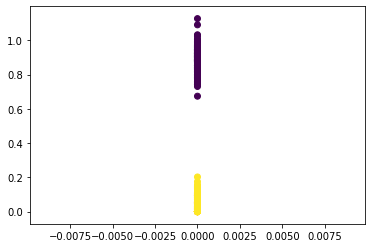

In [17]:
%matplotlib inline
plt.scatter(encoded_2dim[:,0], encoded_2dim[:,1], c=y)

##  Autoencoder for Images - Part One


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
from tensorflow.keras.datasets import mnist

In [20]:
(X_train, y_train), (X_test, y_test) =mnist.load_data()

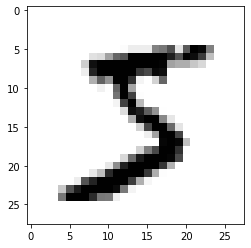

In [21]:
plt.imshow(X_train[0], cmap='binary')

In [22]:
X_train=X_train/255
X_test=X_test/255

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [24]:
# 28*28 = 784
# 784/2 = 392

In [25]:
X_train[0].shape

(28, 28)

In [26]:
encoder=Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [27]:
25/784 # 3% of the size

0.03188775510204082

In [28]:
decoder=Sequential()
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(28*28, activation='sigmoid'))

decoder.add(Reshape([28,28]))

In [29]:
autoencoder=Sequential([encoder, decoder])

autoencoder.compile(loss='binary_crossentropy', optimizer=SGD(lr=1.5), metrics=['accuracy'])

autoencoder.fit(X_train, X_train, epochs=5, validation_data=[X_test, X_test] )

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 24s 399us/sample - loss: 0.2485 - accuracy: 0.7917 - val_loss: 0.2115 - val_accuracy: 0.7946
Epoch 2/5
60000/60000 [==============================] - 21s 349us/sample - loss: 0.1886 - accuracy: 0.7973 - val_loss: 0.1657 - val_accuracy: 0.8014
Epoch 3/5
60000/60000 [==============================] - 22s 361us/sample - loss: 0.1624 - accuracy: 0.8017 - val_loss: 0.1552 - val_accuracy: 0.8016
Epoch 4/5
60000/60000 [==============================] - 24s 397us/sample - loss: 0.1535 - accuracy: 0.8032 - val_loss: 0.1506 - val_accuracy: 0.8022
Epoch 5/5
60000/60000 [==============================] - 22s 361us/sample - loss: 0.1479 - accuracy: 0.8040 - val_loss: 0.1433 - val_accuracy: 0.8038


In [30]:
passed=autoencoder.predict(X_test[:10])

Original image:


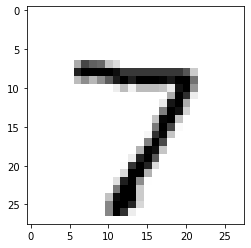

Attempted Reconstruction (after autoencoder)


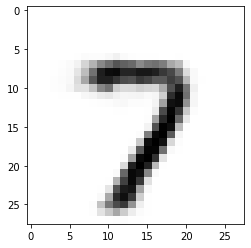

In [31]:
n=0
print('Original image:')
plt.imshow(X_test[n], cmap='binary')
plt.show()
print('Attempted Reconstruction (after autoencoder)')
plt.imshow(passed[n], cmap='binary')

## Autoencoder for Images - Part Two - Noise Removal

In [32]:
from tensorflow.keras.layers import GaussianNoise


sample=GaussianNoise(0.2)
noisey=sample(X_test[:10], training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Original:


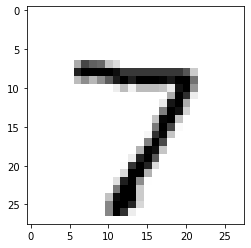

Noisey version:


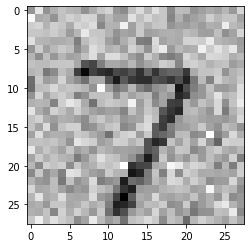

In [42]:
n=0
print('Original:')
plt.imshow(X_test[n], cmap='binary')
plt.show()
print('Noisey version:')
plt.imshow(noisey[n], cmap='binary')

In [39]:
import tensorflow as tf

tf.random.set_seed(101)
np.random.seed(101)

#____ENCODER______
encoder=Sequential()
encoder.add(Flatten(input_shape=[28,28]))
#here add GaussianNoise
encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))




#___DECODER____
decoder=Sequential()
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(28*28, activation='sigmoid'))

decoder.add(Reshape([28,28]))




noise_remover=Sequential([encoder, decoder])
noise_remover.compile(loss='binary_crossentropy', 
                      optimizer='adam', 
                     metrics=['accuracy'])


noise_remover.fit(X_train, X_train, epochs=8)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 26s 439us/sample - loss: 0.1721 - accuracy: 0.8009
Epoch 2/8
60000/60000 [==============================] - 24s 407us/sample - loss: 0.1291 - accuracy: 0.8083
Epoch 3/8
60000/60000 [==============================] - 24s 392us/sample - loss: 0.1197 - accuracy: 0.8099
Epoch 4/8
60000/60000 [==============================] - 23s 389us/sample - loss: 0.1149 - accuracy: 0.8106
Epoch 5/8
60000/60000 [==============================] - 25s 409us/sample - loss: 0.1111 - accuracy: 0.8112
Epoch 6/8
60000/60000 [==============================] - 23s 391us/sample - loss: 0.1083 - accuracy: 0.8116
Epoch 7/8
60000/60000 [==============================] - 26s 426us/sample - loss: 0.1066 - accuracy: 0.8119
Epoch 8/8
60000/60000 [==============================] - 24s 398us/sample - loss: 0.1051 - accuracy: 0.8121


In [40]:
ten_noisey_images=sample(X_test[:10], training=True)

denoised=noise_remover(ten_noisey_images)

Original:


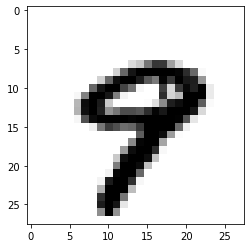

Noise added image:


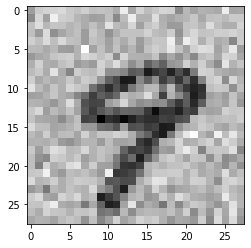

After noise removal from autoencoder:


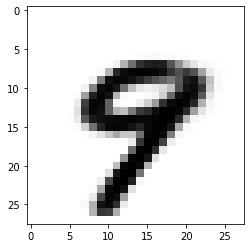

In [45]:
n=9
print('Original:')
plt.imshow(X_test[n], cmap='binary')
plt.show()

print('Noise added image:')
plt.imshow(ten_noisey_images[n], cmap='binary')
plt.show()


print('After noise removal from autoencoder:')
plt.imshow(denoised[n], cmap='binary')
plt.show()
